In [18]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import compute_S_rate
from TemporalNetwork import ContTempNetwork, StaticTempNetwork

In [19]:
net_rw = ContTempNetwork.load('/home/b/skoove/Desktop/entropy/paper_data/socio_pat_primary_school/primaryschoolnet',
                              attributes_list=['node_to_label_dict',
                      'events_table',
                      'times',
                      'time_grid',
                      'num_nodes',
                      '_overlapping_events_merged',
                      'start_date',
                      'node_label_array',
                      'male_array',
                      'female_array',
                      'node_first_start_array',
                      'node_last_end_array',
                      'node_class_array',
                      'datetimes'])

In [2]:
lamdas_growing = np.logspace(-5,0,200)

In [5]:
lamda = lamdas_growing[-1]

In [29]:
with open(f'//scratch/tmp/180/skoove/primaryschoolnet_rw/Tplot/T{lamda:.11f}', 'rb') as f:
    T0_240 = pickle.load(f)

In [30]:
with open(f'//scratch/tmp/180/skoove/primaryschoolnet_rw/Tplot240_600/T{lamda:.11f}', 'rb') as f:
    T240_600 = pickle.load(f)

In [37]:
with open(f'//scratch/tmp/180/skoove/primaryschoolnet_rw/Tplot600_960/T{lamda:.11f}', 'rb') as f:
    T600_960 = pickle.load(f)

In [40]:
with open(f'//scratch/tmp/180/skoove/primaryschoolnet_rw/Tplot960_1320/T{lamda:.11f}', 'rb') as f:
    T960_1320 = pickle.load(f)

In [41]:
with open(f'//scratch/tmp/180/skoove/primaryschoolnet_rw/Tplot1320_1556/T{lamda:.11f}', 'rb') as f:
    T1320_1556 = pickle.load(f)

In [42]:
H_0_240_rw = compute_S_rate.compute_conditional_entropy(net=net_rw, list_T=T0_240['T'][0:240], lamda=1, force_csr=True, time_domain= range(240-1))

In [43]:
H_240_600_rw = compute_S_rate.compute_conditional_entropy(net=net_rw, list_T=T240_600['T'], lamda=1, force_csr=True, time_domain= range(600-240-1))

In [44]:
H_600_960_rw = compute_S_rate.compute_conditional_entropy(net=net_rw, list_T=T600_960['T'], lamda=1, force_csr=True, time_domain= range(960-600-1))

In [45]:
H_960_1320_rw = compute_S_rate.compute_conditional_entropy(net=net_rw, list_T=T960_1320['T'], lamda=1, force_csr=True, time_domain= range(1320-960-1))

In [46]:
H_1320_1556_rw = compute_S_rate.compute_conditional_entropy(net=net_rw, list_T=T1320_1556['T'], lamda=1, force_csr=True, time_domain= range(1556-1320-1))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


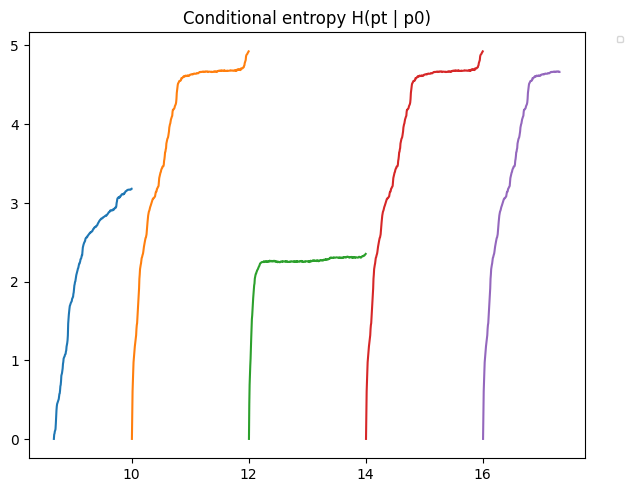

In [47]:
plt.plot((net_rw.times / 3600)[0:240], H_0_240_rw['1.00000000000'][0:240])
plt.plot((net_rw.times / 3600)[240:600], H_240_600_rw['1.00000000000'][0:600-240])
plt.plot((net_rw.times / 3600)[600:960], H_600_960_rw['1.00000000000'][0:960-600])
plt.plot((net_rw.times / 3600)[960:1320], H_240_600_rw['1.00000000000'][0:1320-960])
plt.plot((net_rw.times / 3600)[1320:1556], H_240_600_rw['1.00000000000'][0:1556-1320])


plt.legend(fontsize='xx-small', loc='upper left',  bbox_to_anchor=(1.05, 1))
plt.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Conditional entropy H(pt | p0)')
#plt.savefig('/home/b/skoove/Desktop/primary_school/conditionalH_shaded.png', format='png', dpi=300, bbox_inches='tight')
plt.show()